In [1]:
!pip install pomegranate

     |████████████████████████████████| 4.3 MB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pomegranate: filename=pomegranate-0.14.8-cp37-cp37m-linux_x86_64.whl size=15006483 sha256=e9942aea92debfaf39a21ce11fab94da4e0a2487d73d6343d26a8eba81876eff
  Stored in directory: /root/.cache/pip/wheels/24/68/69/0eaab474ef1d65abedcd47de8a38ab21d221d329954d7edd24
Successfully built pomegranate


In [2]:
import pandas as pd
import numpy as np

In [8]:
import pickle
from pomegranate import BayesianNetwork

In [7]:
with open("../models/bayesian_18countries_estmodel_pomegranate_structure.pkl", "rb") as handle:
  struct = pickle.load(handle)

In [9]:
train_df = pd.read_csv("../data/processed/train_18_countries.csv")
print(train_df.shape)
train_df.head()

(495, 325)


,cancel_public_events_germany,pi_campaign_germany,shn_requirement_israel,school_closures_united_states,cases_per_mil_china,restrict_public_gathering_united_states,debt_relief_india,vaccine_policy_malaysia,testing_policy_hong_kong,contact_tracing_china,...,cases_per_mil_cat_finland,cases_per_mil_cat_hong_kong,cases_per_mil_cat_indonesia,cases_per_mil_cat_india,cases_per_mil_cat_israel,cases_per_mil_cat_malaysia,cases_per_mil_cat_new_zealand,cases_per_mil_cat_singapore,cases_per_mil_cat_united_states,cases_per_mil_cat_south_africa
0,1,2,0,2,66.598757,4,1.0,5,3.0,2.0,...,1,0,1,1,6,4,0,1,6,2
1,2,2,0,2,65.405387,4,1.0,4,3.0,2.0,...,1,0,1,1,5,2,0,1,5,2
2,2,2,0,2,68.002072,4,1.0,5,3.0,2.0,...,2,0,1,1,6,4,0,2,6,2
3,2,2,0,2,65.745166,4,1.0,4,3.0,2.0,...,1,0,1,1,6,3,0,1,6,2
4,2,2,0,2,72.752072,4,1.0,5,3.0,2.0,...,4,0,1,1,6,4,0,3,6,3


In [10]:
test_df = pd.read_csv("../data/processed/test_18_countries.csv")
print(test_df.shape)
test_df.head()

(165, 325)


,cancel_public_events_germany,pi_campaign_germany,shn_requirement_israel,school_closures_united_states,cases_per_mil_china,restrict_public_gathering_united_states,debt_relief_india,vaccine_policy_malaysia,testing_policy_hong_kong,contact_tracing_china,...,cases_per_mil_cat_finland,cases_per_mil_cat_hong_kong,cases_per_mil_cat_indonesia,cases_per_mil_cat_india,cases_per_mil_cat_israel,cases_per_mil_cat_malaysia,cases_per_mil_cat_new_zealand,cases_per_mil_cat_singapore,cases_per_mil_cat_united_states,cases_per_mil_cat_south_africa
0,2,2,0,2,62.876381,4,1.0,4,3.0,2.0,...,1,0,0,1,4,1,0,1,5,1
1,2,2,0,2,62.264503,4,2.0,2,3.0,2.0,...,1,0,0,0,4,1,0,1,4,1
2,1,2,0,2,66.659530,4,1.0,5,3.0,2.0,...,1,0,1,1,6,4,0,1,6,2
3,2,2,2,3,57.348066,4,2.0,0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,0
4,2,2,0,2,63.528315,3,1.0,4,3.0,2.0,...,1,0,0,1,4,1,0,1,5,2


In [31]:
estimated_model = BayesianNetwork.from_structure(X=train_df, structure=struct)

In [17]:
test_df.filter(regex="[a-z]*_singapore|date").columns

Index(['vaccine_policy_singapore', 'cancel_public_events_singapore',
       'restriction_internal_movement_singapore', 'contact_tracing_singapore',
       'pi_campaign_singapore', 'closure_public_transport_singapore',
       'debt_relief_singapore', 'shn_requirement_singapore',
       'income_support_singapore', 'restrict_public_gathering_singapore',
       'testing_policy_singapore', 'internation_travel_control_singapore',
       'date', 'facial_covering_singapore', 'confirmed_deathes_singapore',
       'cases_per_mil_singapore', 'school_closures_singapore',
       'workplace_closures_singapore', 'cases_per_mil_cat_singapore'],
      dtype='object')

In [25]:
test_df.iloc[0].values

array([2, 2, 0, 2, 62.876381215469614, 4, 1.0, 4, 3.0, 2.0, 3, 4, 2, 1,
       1.0, 1.0, 2, 1.0, 26.0, 2, 3.0, 2, 1, 3, 0, 1, 2,
       1578.1333333333334, 16662.45487364621, 6406.0, 2, 2, 2, 4, 3.0,
       79920.43879907622, 1, 1.0, 0, 2, 79895.63794983643, 0, 3.0, 0, 2,
       2.0, 1.0, 26085.0, 3, 3, 2, 3.0, 2, 1, 4.0, 14904.0, 3.0, 1, 2.0,
       3.0, 4.0, 3.0, 0, 0, 4.0, 4, 2, 4, 0, 2.0, 1, 2, 4, 2, 2, 2, 3.0,
       0, 2.0, 4, 2, 3, 2.0, 2.0, 521.2196931245852, 49907.0, 4, 2.0, 4,
       0, 1, 2, 2, 2, 1, 4, 1, 1, 2.0, 2, 1.0, 0, 10700.0, 0.0, 2, 4,
       27499.616666666665, 3.0, 2, 1.0, 4, 3, 1, 1.0, 1, 2, 4, 3.0, 2, 1,
       0.0, 3.0, 456998.0, 2, 210.0, 2, 43789.86039804567, 3.0, 4, 3.0,
       592499.0, 2, 4, 2, 1, 0, 2.0, 2, 3, 1.0, 3.0, 1.0, 1, 3, 0, 2, 0,
       2, 1, 0, '2021-05-27', 3, 4, 3, 100109.2491838001, 2,
       1167.9133496371562, 2491.0, 2, 2.0, 1, 2, 4636.0, 2, 1, 88192.0, 5,
       1.0, 2, 4, 3, 2.0, 5, 2.0, 2.0, 2, 3.0, 2.0, 1, 4,
       19824.06978417266,

In [44]:
date_index = list(test_df.iloc[0].index).index("date")
date_index

150

In [59]:
preds = None
for idx, row in test_df.iterrows():
  # print(row["date"])
  test_input = []
  for i in range(test_df.shape[1]):
    if i != date_index and "cases_per_mil" not in test_df.columns[i] and "confirmed_deathes" not in test_df.columns[i]:
      if row.values[i] not in train_df[test_df.columns[i]].unique(): # ensure this value has been seen while training
        test_input.append(None)
      else:
        test_input.append(row.values[i])
    else:
      test_input.append(None)
  p = np.array(estimated_model.predict([test_input])[0])
  preds = (np.vstack((preds, p)) if (preds is not None) else p)
  # print(preds)

  if idx > 0 and idx % 10 == 0:
    print(preds.shape)
    # print(preds)

(11, 325)
(21, 325)
(31, 325)
(41, 325)
(51, 325)
(61, 325)
(71, 325)
(81, 325)
(91, 325)
(101, 325)
(111, 325)
(121, 325)
(131, 325)
(141, 325)
(151, 325)
(161, 325)


In [61]:
preds_df = pd.DataFrame(preds, columns = test_df.columns)
print(preds_df.shape)
preds_df

(165, 325)


,cancel_public_events_germany,pi_campaign_germany,shn_requirement_israel,school_closures_united_states,cases_per_mil_china,restrict_public_gathering_united_states,debt_relief_india,vaccine_policy_malaysia,testing_policy_hong_kong,contact_tracing_china,...,cases_per_mil_cat_finland,cases_per_mil_cat_hong_kong,cases_per_mil_cat_indonesia,cases_per_mil_cat_india,cases_per_mil_cat_israel,cases_per_mil_cat_malaysia,cases_per_mil_cat_new_zealand,cases_per_mil_cat_singapore,cases_per_mil_cat_united_states,cases_per_mil_cat_south_africa
0,2,2,0,2,57.29489,4,1.0,4,3.0,2.0,...,1,0,0,0,4,4,0,1,4,1
1,2,2,0,2,57.29489,4,2.0,2,3.0,2.0,...,1,0,0,0,4,0,0,1,4,1
2,1,2,0,2,66.848757,4,1.0,5,3.0,2.0,...,0,0,0,1,6,4,0,1,6,1
3,2,2,2,3,57.29489,4,2.0,0,2.0,2.0,...,0,0,0,0,0,0,0,1,4,1
4,2,2,0,2,57.29489,3,1.0,4,3.0,2.0,...,0,0,0,0,4,4,0,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,2,2,0,2,57.29489,3,1.0,4,3.0,2.0,...,0,0,0,0,4,4,0,1,4,1
161,2,2,0,2,66.848757,3,1.0,5,3.0,2.0,...,0,0,0,1,6,4,0,1,6,3
162,2,2,0,2,57.29489,4,0.0,2,3.0,2.0,...,0,0,0,0,4,4,0,1,4,1
163,2,2,2,3,57.29489,4,2.0,0,2.0,2.0,...,0,0,0,0,4,0,0,1,4,1


In [62]:
preds_df["date"]

0      2020-05-13
1      2020-05-13
2      2020-05-13
3      2020-05-31
4      2020-05-13
          ...    
160    2020-05-13
161    2020-10-23
162    2020-05-13
163    2020-05-13
164    2020-05-13
Name: date, Length: 165, dtype: object

In [84]:
preds_df["date"].unique()

array(['2020-05-13', '2020-05-31', '2020-10-23'], dtype=object)

In [63]:
test_df["date"]

0      2021-05-27
1      2021-03-26
2      2021-10-16
3      2020-06-07
4      2021-07-08
          ...    
160    2021-08-07
161    2021-12-13
162    2021-04-11
163    2020-05-19
164    2021-05-25
Name: date, Length: 165, dtype: object

In [91]:
month_dist = pd.to_datetime(test_df["date"]).dt.month
month_dist

0       5
1       3
2      10
3       6
4       7
       ..
160     8
161    12
162     4
163     5
164     5
Name: date, Length: 165, dtype: int64

Text(0.5, 1.0, 'Distribution of data points over months in test data')

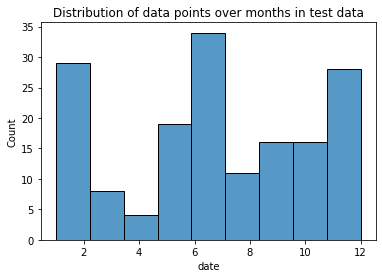

In [99]:
import seaborn as sns
sns.histplot(month_dist)
plt.title("Distribution of data points over months in test data")

Text(0.5, 1.0, 'Distribution of data points over months in complete data')

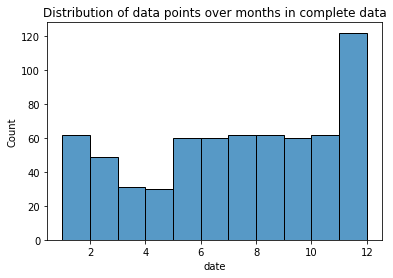

In [100]:
sns.histplot(pd.to_datetime(pd.concat([train_df, test_df], axis = 0).reset_index()["date"]).dt.month)
plt.title("Distribution of data points over months in complete data")

In [82]:
diff_date = (pd.to_datetime(test_df["date"]) - pd.to_datetime(preds_df["date"])).dt.days
diff_date

0      379
1      317
2      521
3        7
4      421
      ... 
160    451
161    416
162    333
163      6
164    377
Name: date, Length: 165, dtype: int64

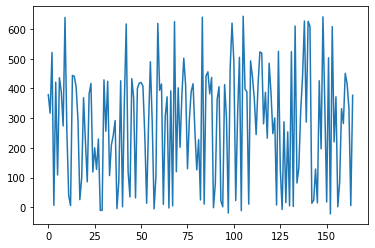

In [83]:
plt.plot(diff_date.index, diff_date.values)